In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

About Dataset
Context
Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

Content
The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

You need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons.

Data Description

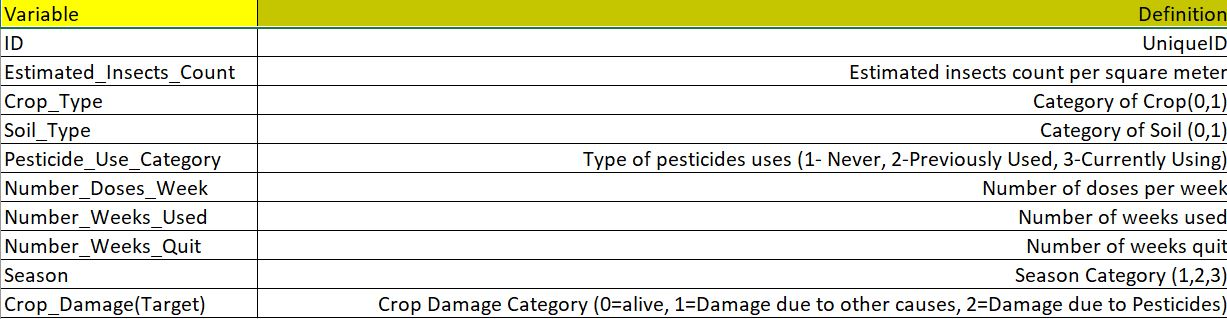

In [2]:
train=pd.read_csv("DATASET/train.csv")

In [3]:
train.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [4]:
train.shape

(88858, 10)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


# Null_Value

In [6]:
(train.isnull().sum()/train.shape[0])*100

ID                          0.00000
Estimated_Insects_Count     0.00000
Crop_Type                   0.00000
Soil_Type                   0.00000
Pesticide_Use_Category      0.00000
Number_Doses_Week           0.00000
Number_Weeks_Used          10.12852
Number_Weeks_Quit           0.00000
Season                      0.00000
Crop_Damage                 0.00000
dtype: float64

> ## CROP_DAMAGE

In [7]:
value_1={
    0:"Alive",
    1:"Damage due to Other region",
    2:"Damage due to pesticides"
}

In [8]:
train['Crop_Damage']=train['Crop_Damage'].map(value_1)

In [9]:
print(train['Crop_Damage'].value_counts())
print("-"*30)
print((train['Crop_Damage'].value_counts()/train.shape[0])*100)

Crop_Damage
Alive                         74238
Damage due to Other region    12307
Damage due to pesticides       2313
Name: count, dtype: int64
------------------------------
Crop_Damage
Alive                         83.546783
Damage due to Other region    13.850188
Damage due to pesticides       2.603030
Name: count, dtype: float64


> ## Estimated_Insects_Count

In [10]:
train['Estimated_Insects_Count'].value_counts()

Estimated_Insects_Count
1212    3438
1132    3370
1478    3358
1385    3309
1056    3235
        ... 
3896     134
3515     123
4097     113
231       89
169       63
Name: count, Length: 71, dtype: int64

<Axes: xlabel='Estimated_Insects_Count'>

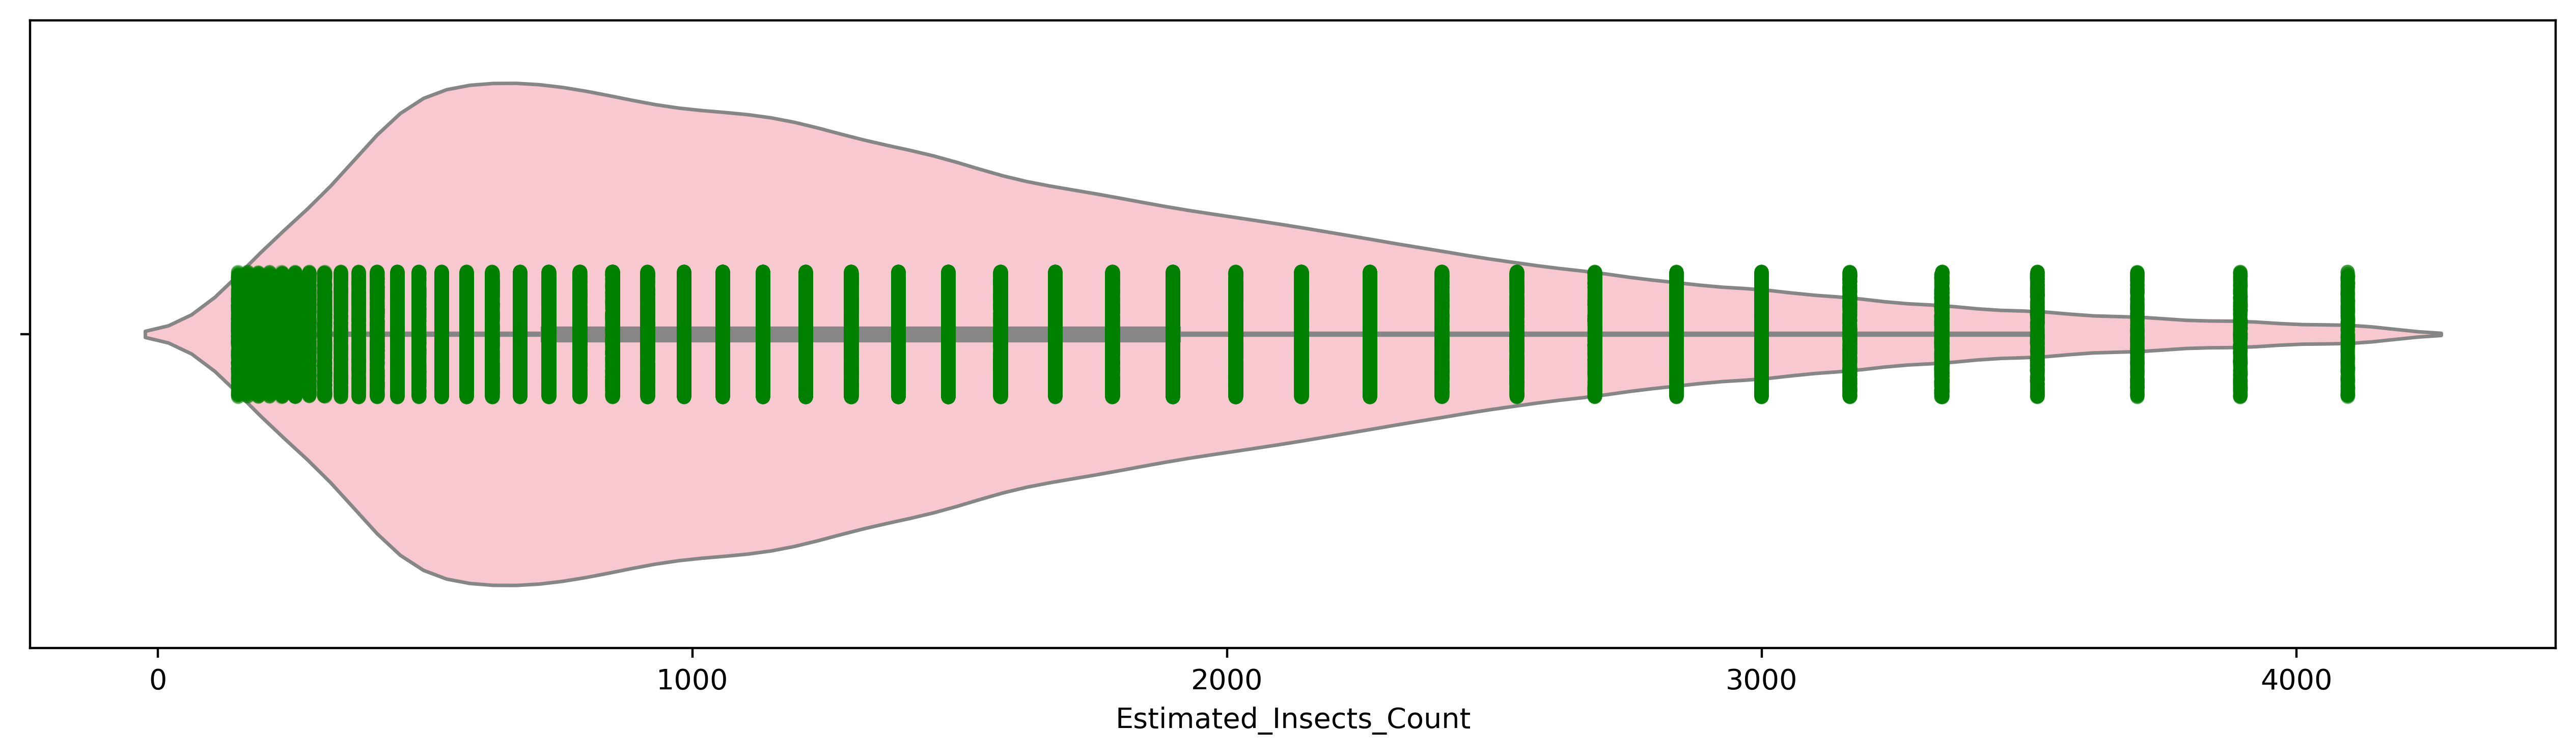

In [11]:
plt.figure(figsize=(16,4),dpi=400)
sns.violinplot(x=train['Estimated_Insects_Count'],color='pink')
sns.stripplot(x=train['Estimated_Insects_Count'],color='green',alpha=0.3)

> ## Crop_type

In [12]:
print(train['Crop_Type'].value_counts())
print("-"*30)
print((train['Crop_Type'].value_counts()/train.shape[0])*100)

Crop_Type
0    63589
1    25269
Name: count, dtype: int64
------------------------------
Crop_Type
0    71.562493
1    28.437507
Name: count, dtype: float64


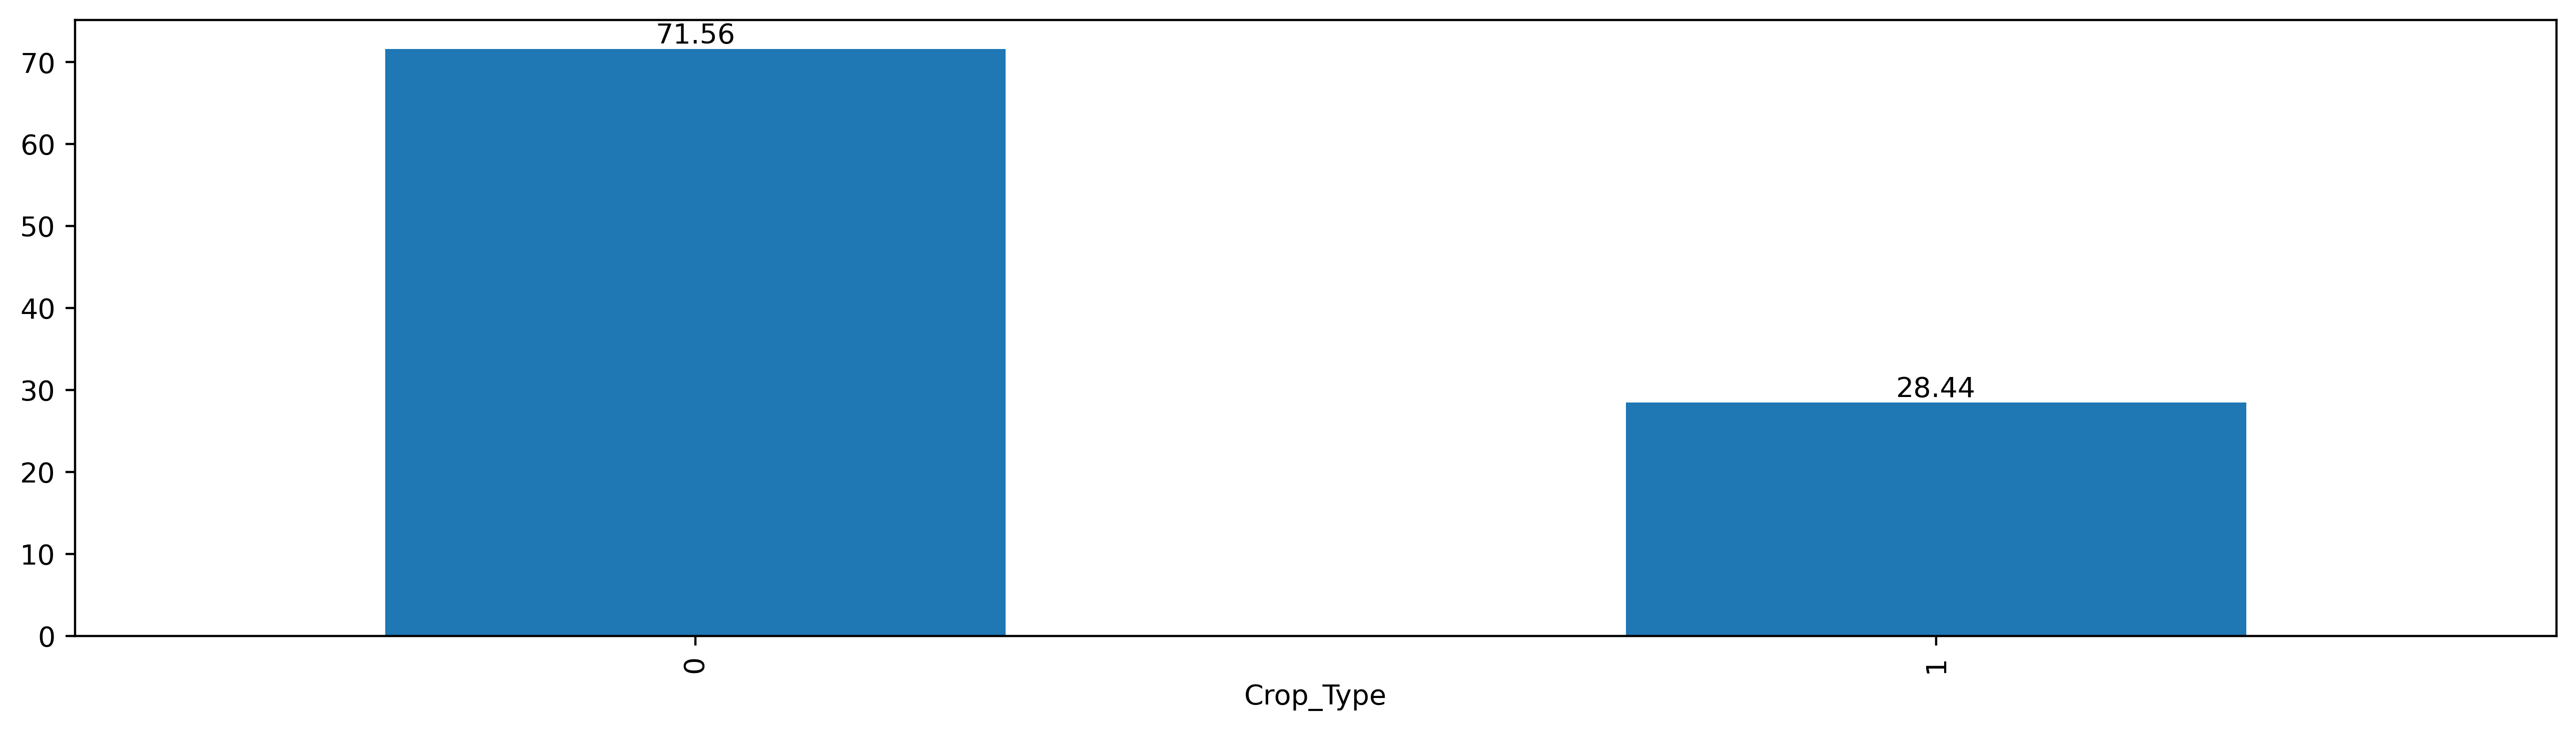

In [13]:
plt.figure(figsize=(16,4),dpi=400)
ax=((train['Crop_Type'].value_counts()/train.shape[0])*100).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

> ## SOIL_TYPE

In [14]:
print(train['Soil_Type'].value_counts())
print("-"*30)
print((train['Soil_Type'].value_counts()/train.shape[0])*100)

Soil_Type
0    48124
1    40734
Name: count, dtype: int64
------------------------------
Soil_Type
0    54.15832
1    45.84168
Name: count, dtype: float64


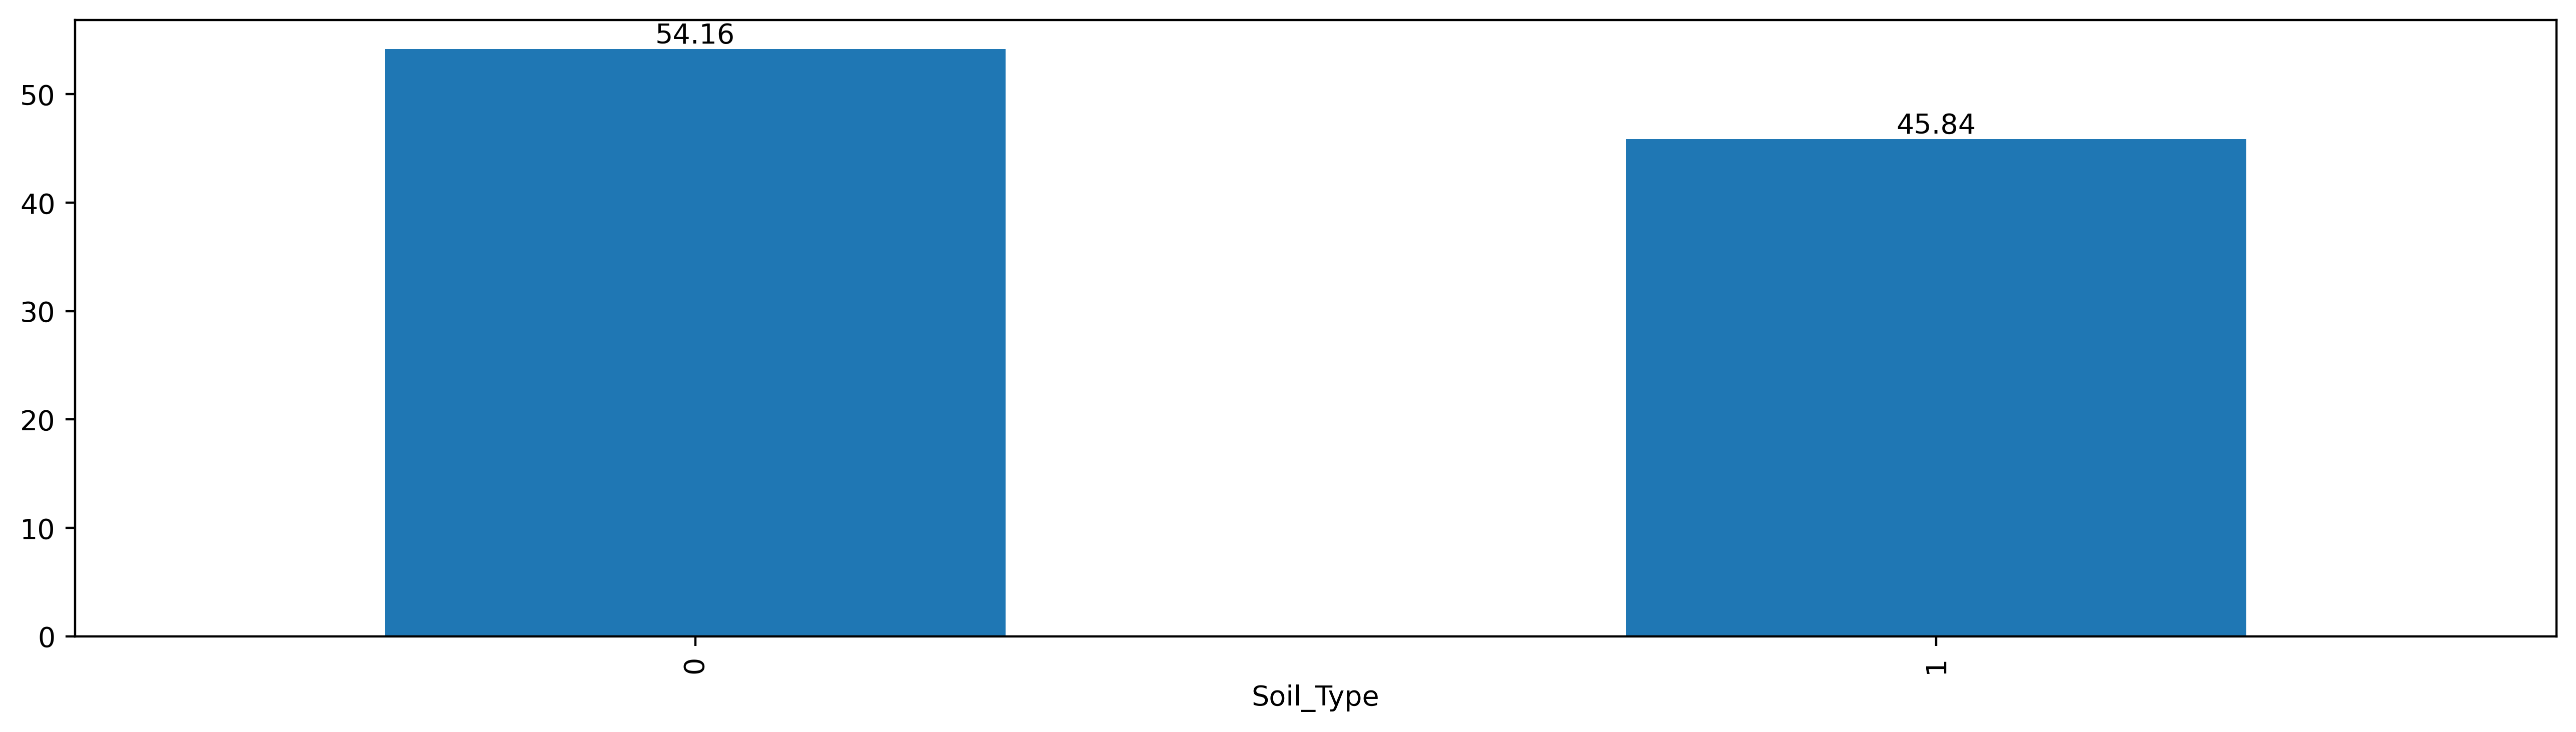

In [15]:
plt.figure(figsize=(16,4),dpi=400)
ax=((train['Soil_Type'].value_counts()/train.shape[0])*100).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')

> ## Pesticide_Use_Category      

In [16]:
value={1:"Never",
      2:"Previously used",
      3:"Currently using"}

In [17]:
train['Pesticide_Use_Category']=train["Pesticide_Use_Category"].map(value)

In [18]:
print(train['Pesticide_Use_Category'].value_counts())
print("-"*30)
print((train['Pesticide_Use_Category'].value_counts()/train.shape[0])*100)

Pesticide_Use_Category
Previously used    63709
Currently using    24312
Never                837
Name: count, dtype: int64
------------------------------
Pesticide_Use_Category
Previously used    71.697540
Currently using    27.360508
Never               0.941952
Name: count, dtype: float64


> ## Season

In [19]:
print(train['Season'].value_counts())
print("-"*30)
print((train['Season'].value_counts()/train.shape[0])*100)

Season
2    44210
1    26902
3    17746
Name: count, dtype: int64
------------------------------
Season
2    49.753539
1    30.275271
3    19.971190
Name: count, dtype: float64


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  object 
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 6.8+ MB


## Outlier

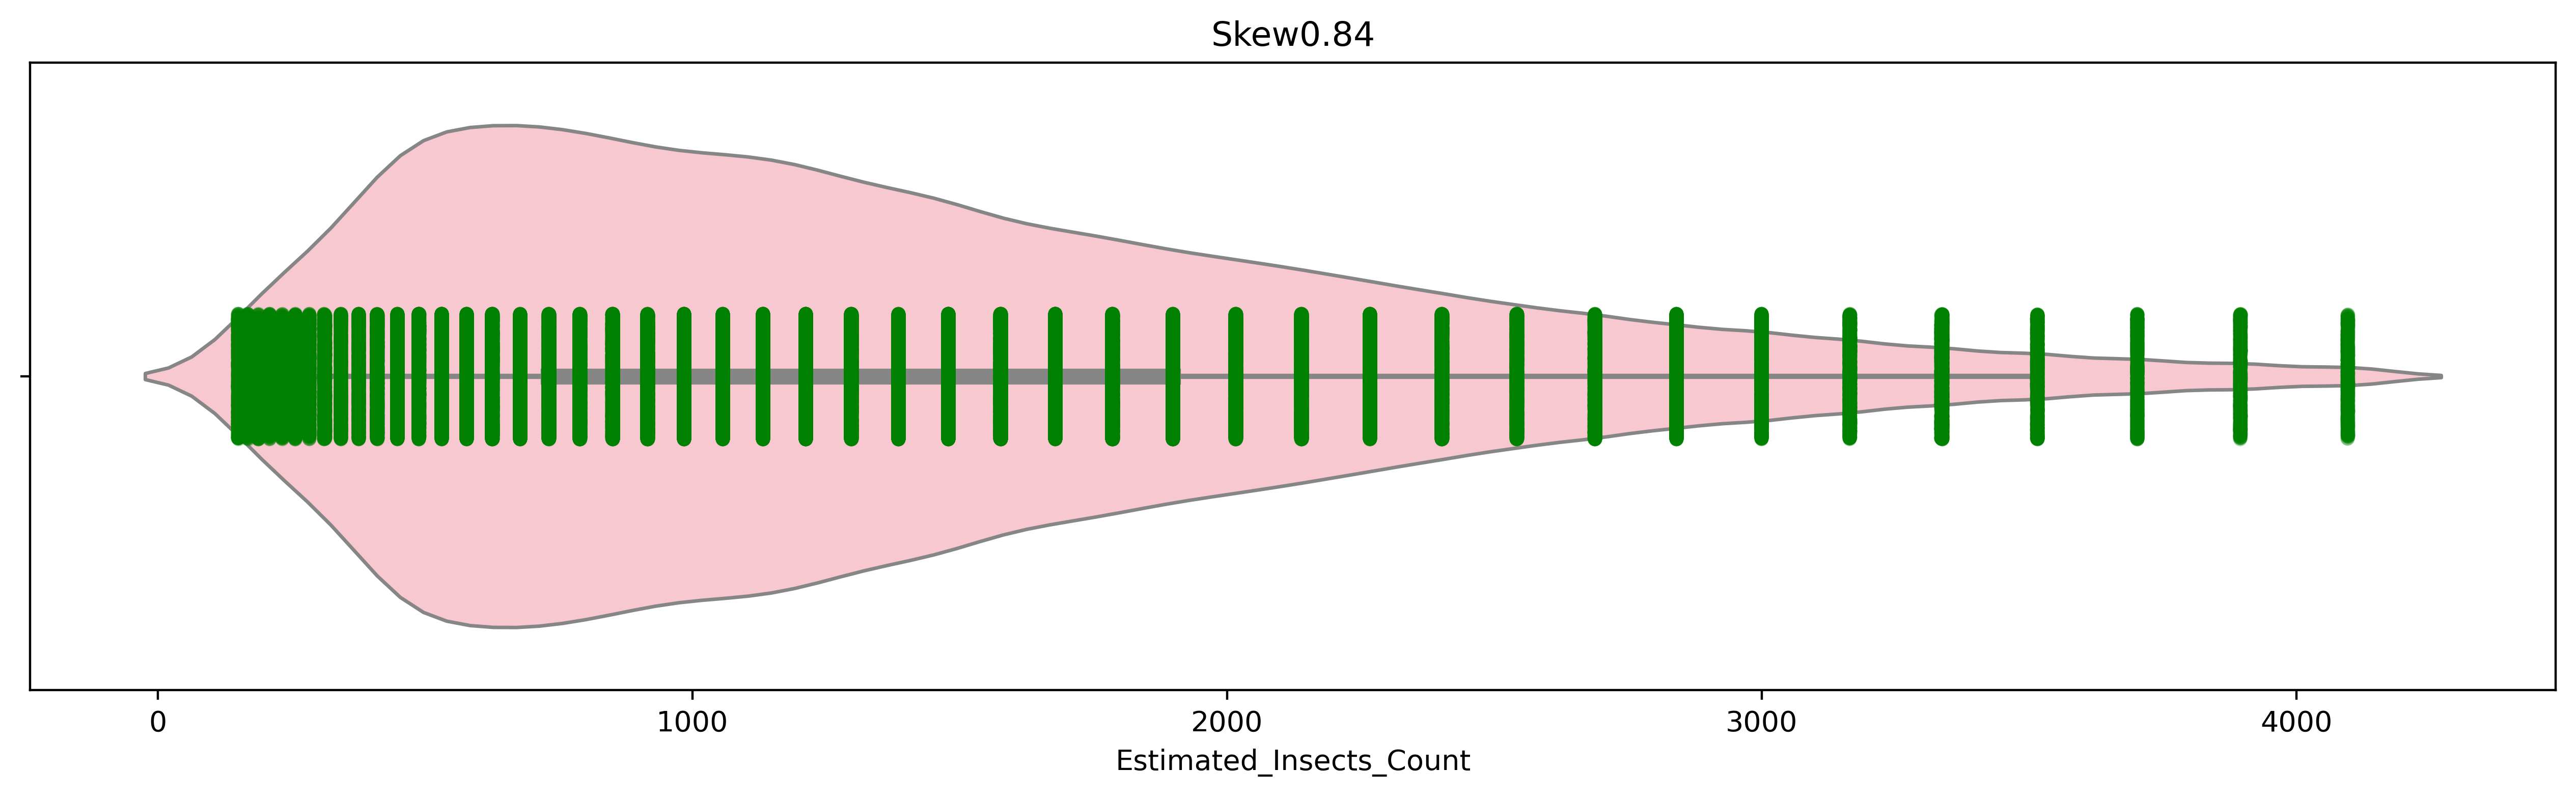

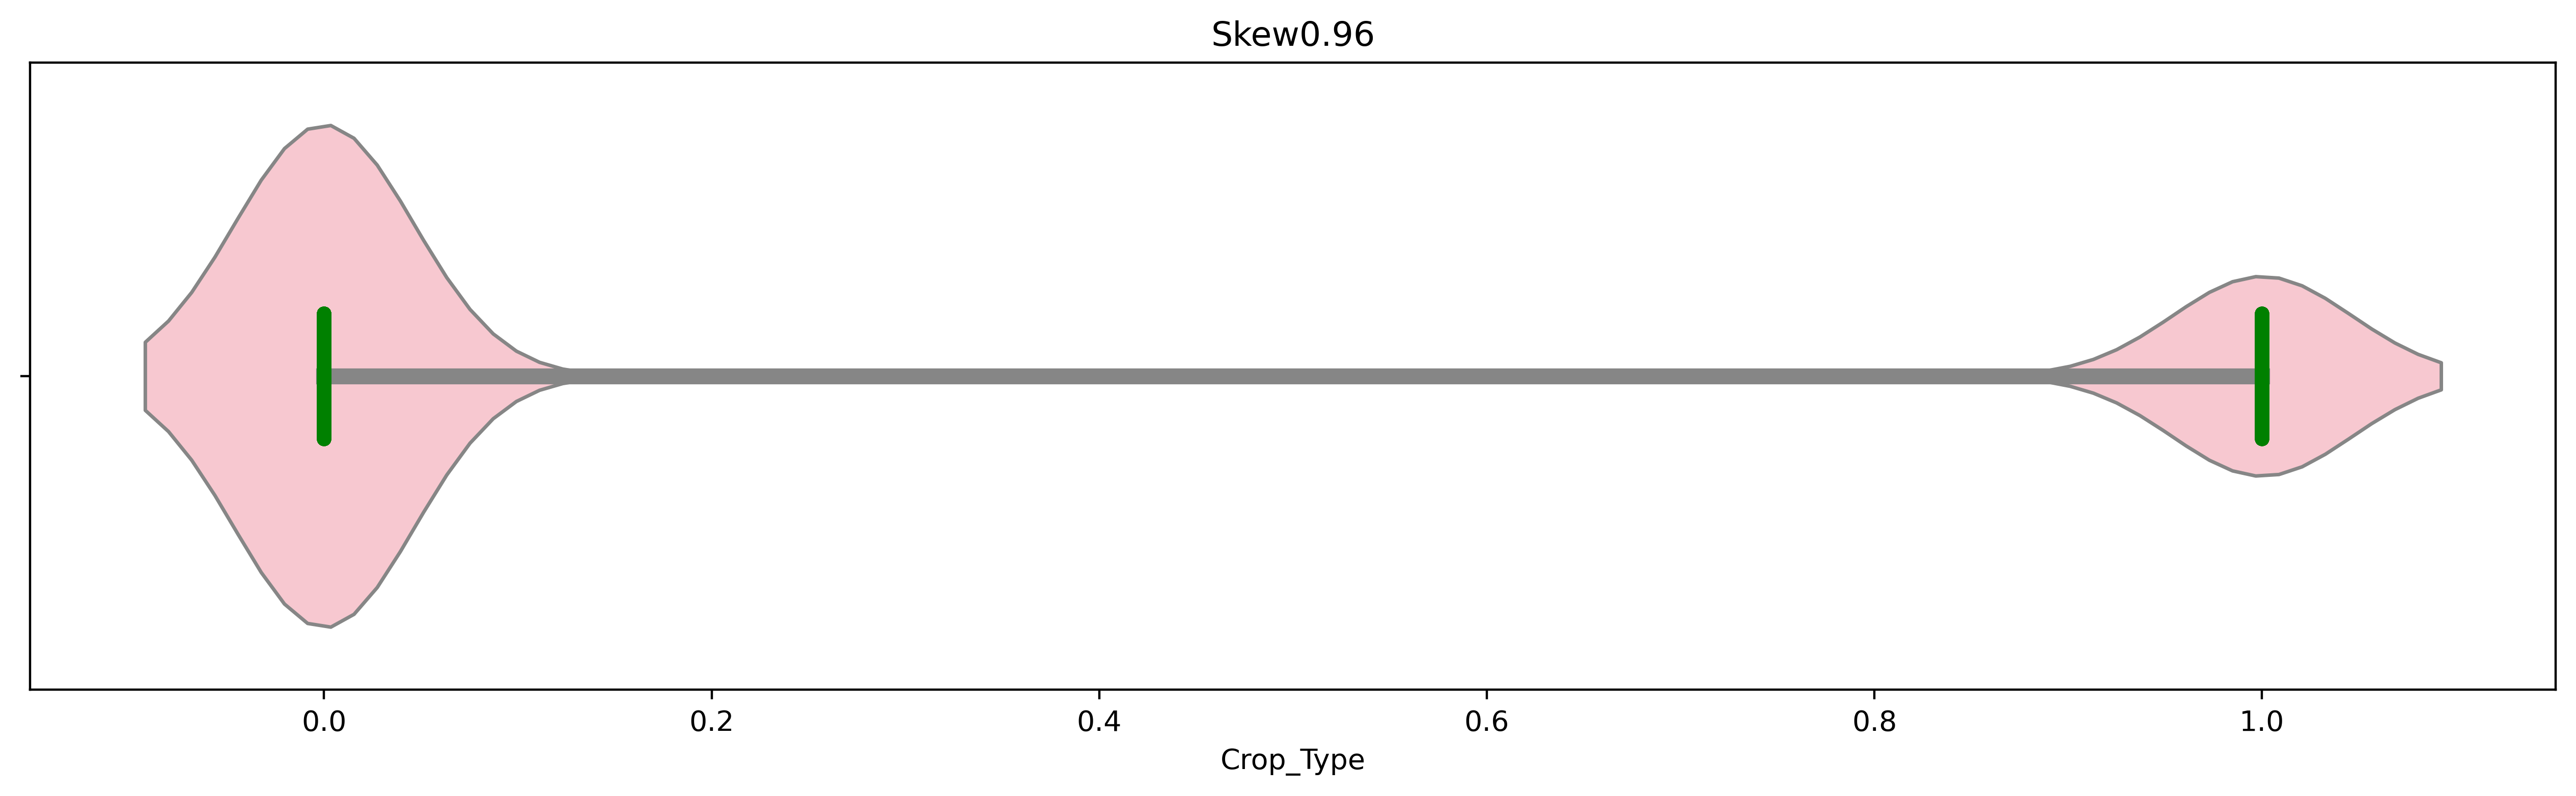

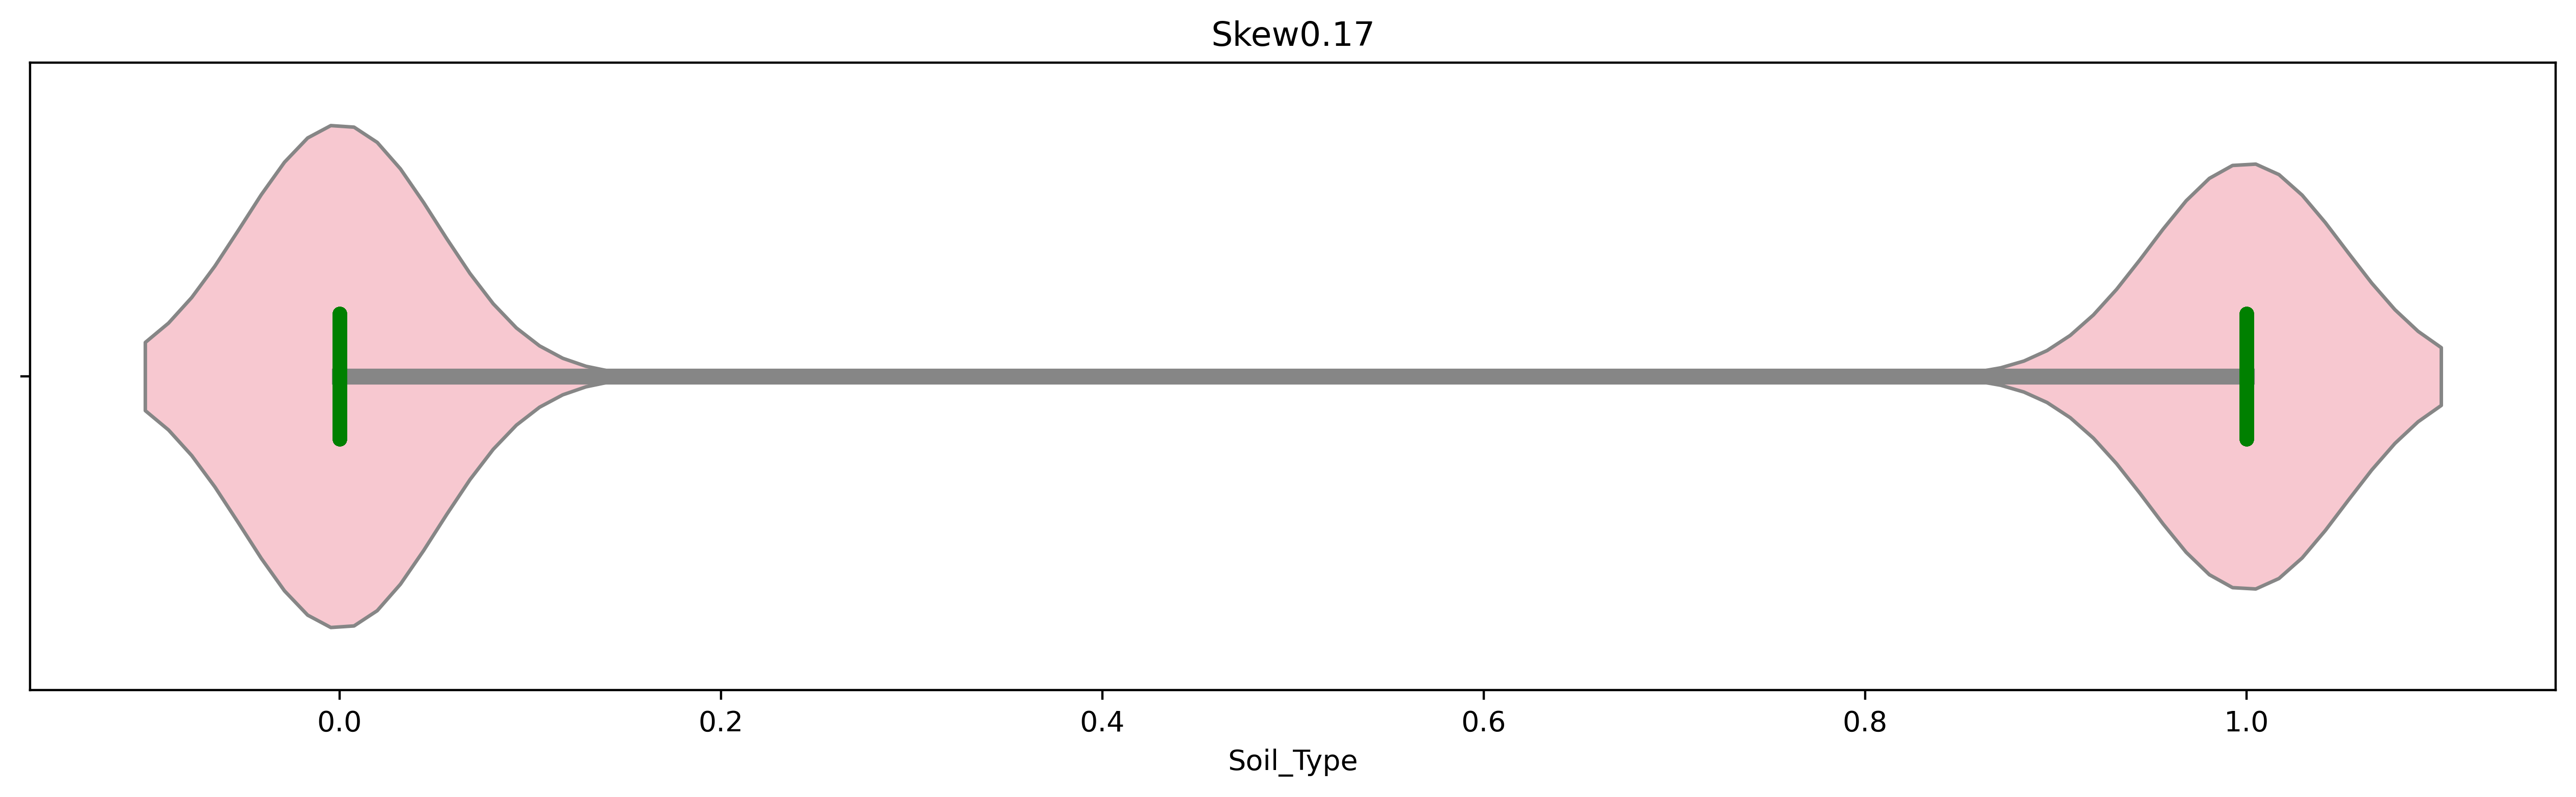

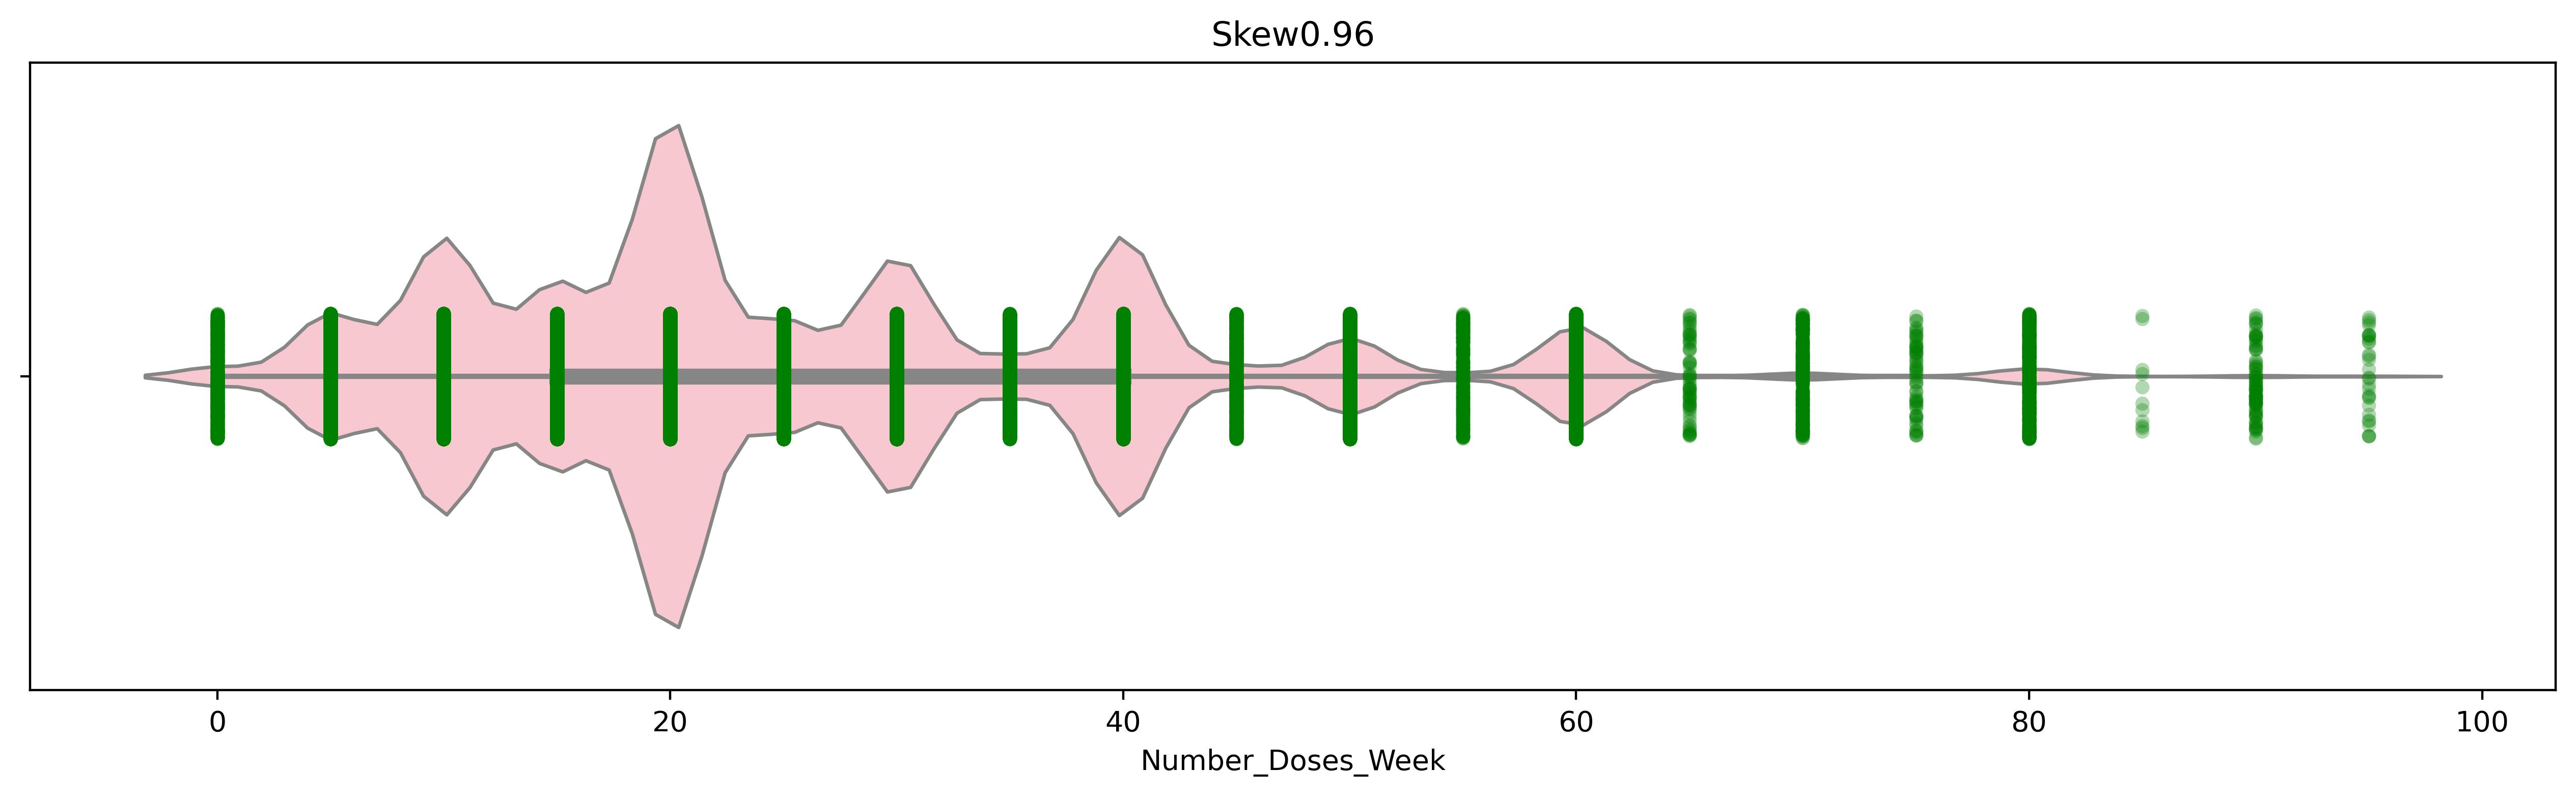

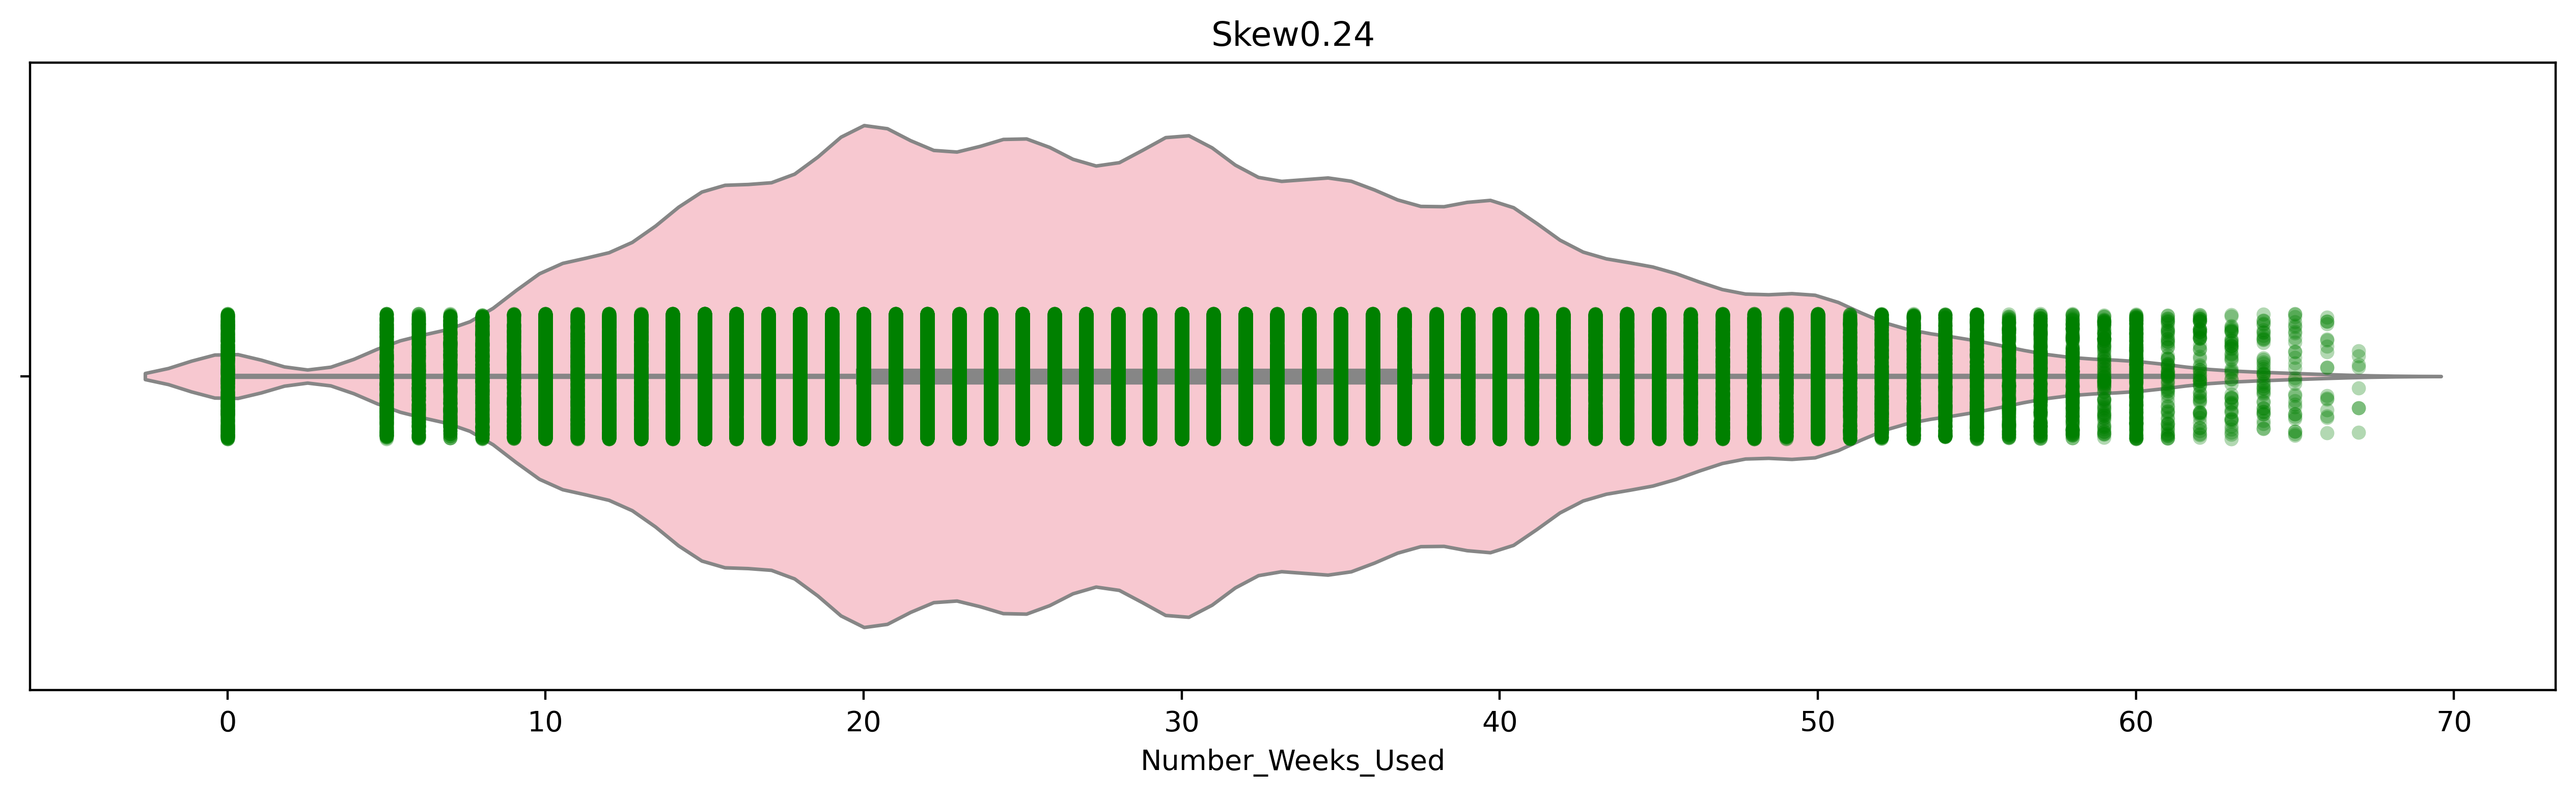

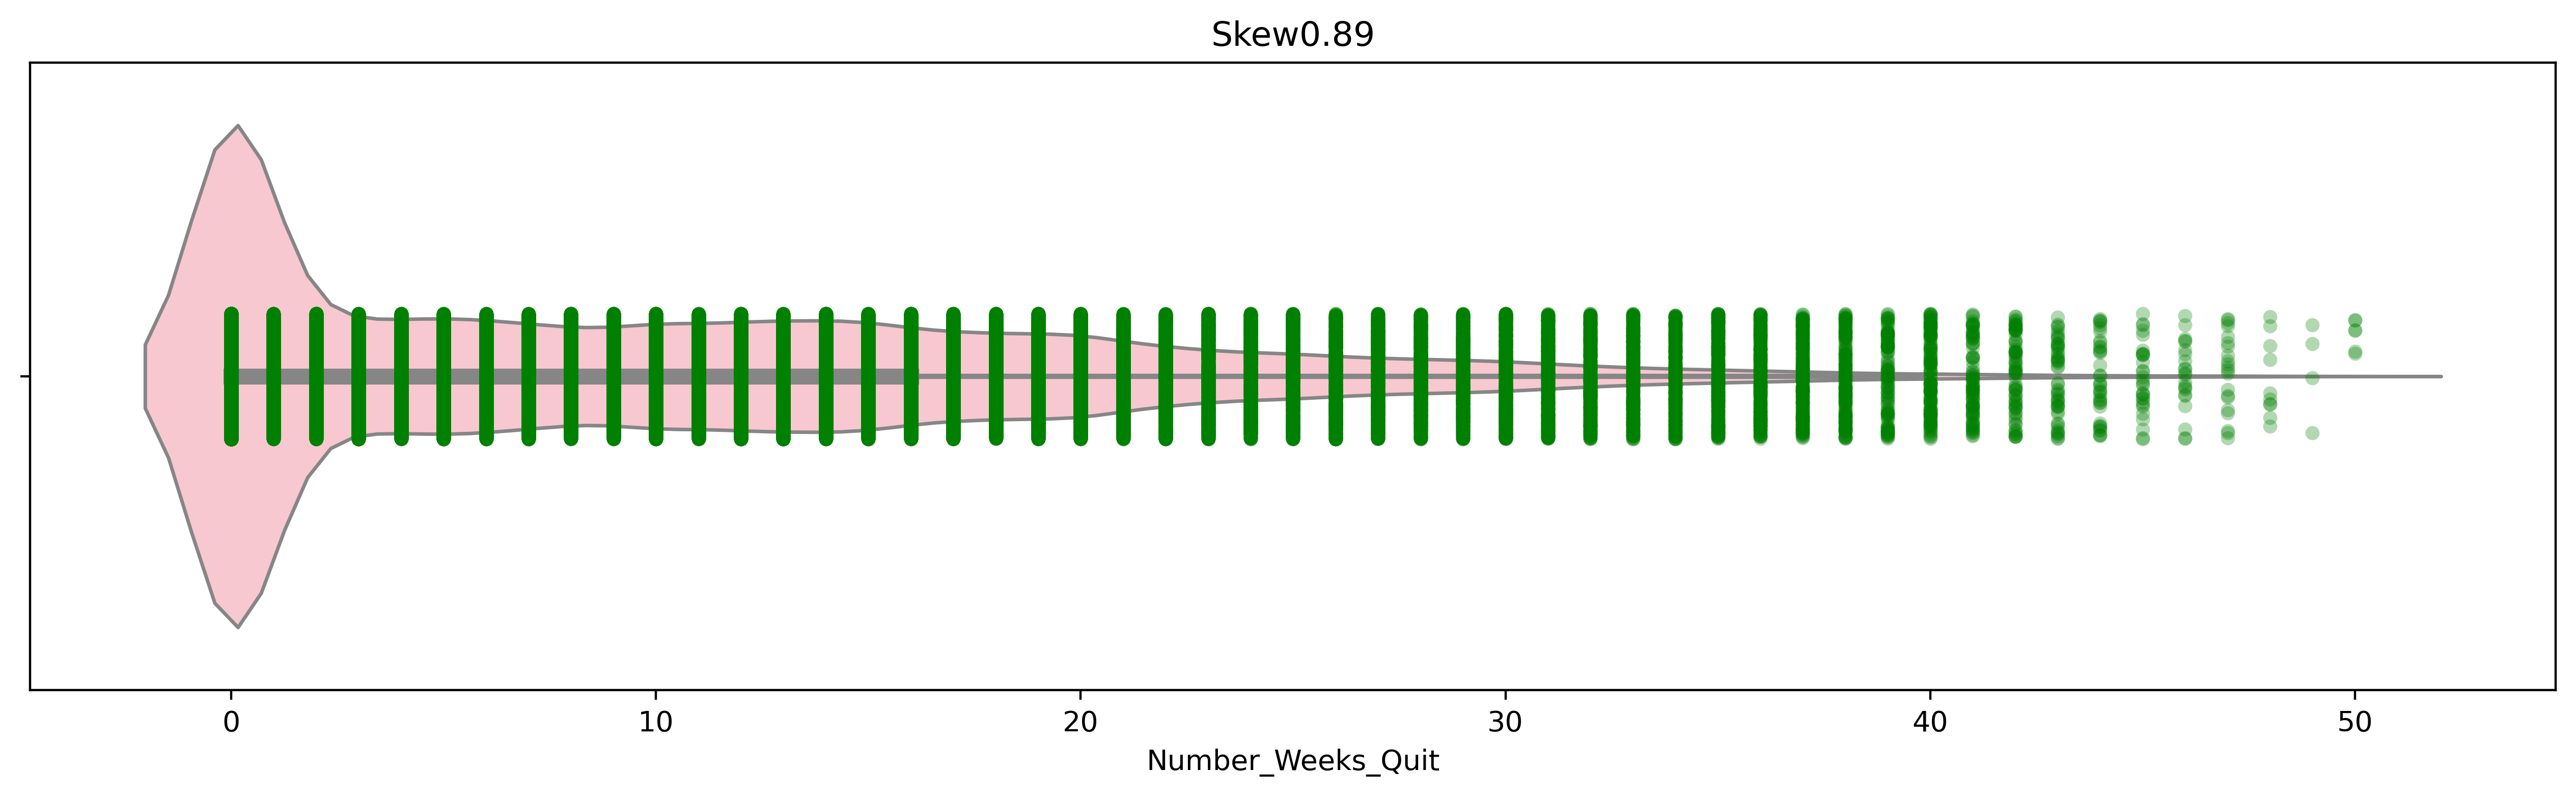

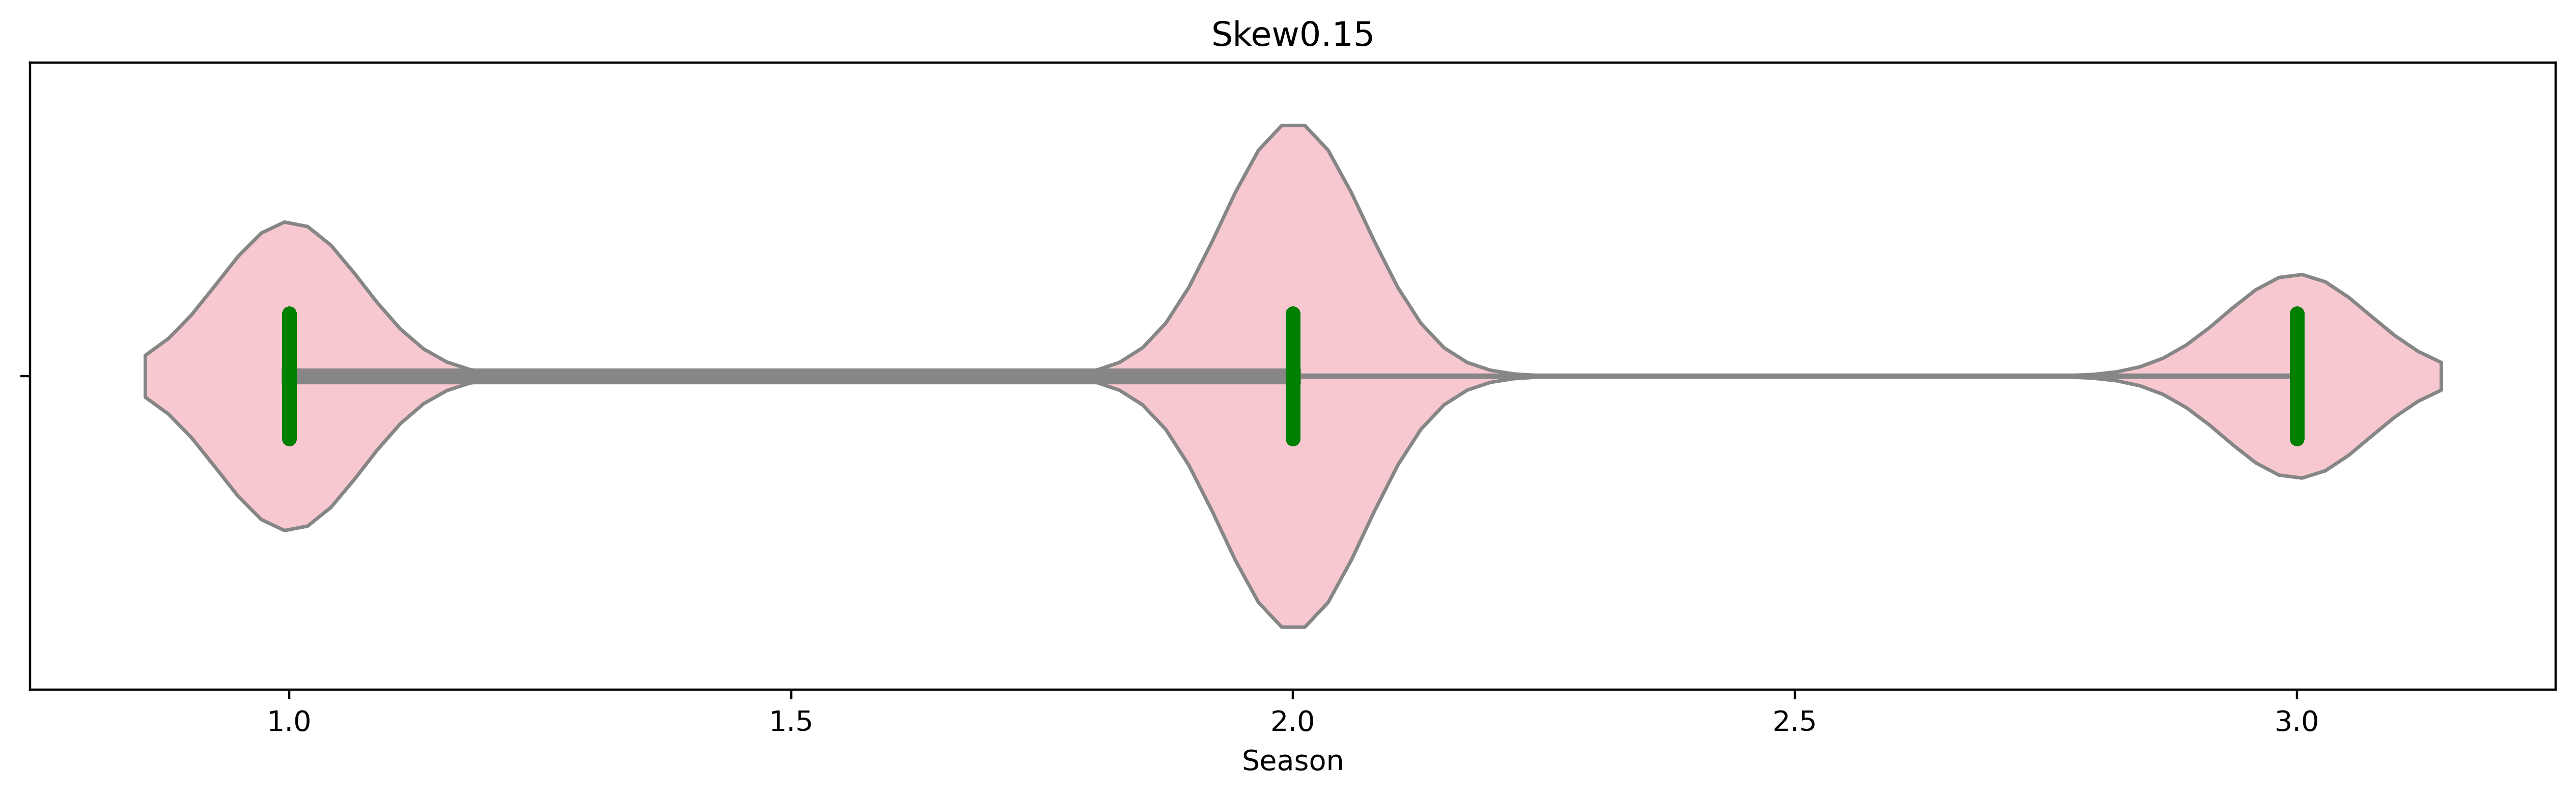

In [21]:
for i in train.select_dtypes(include=['number']):
    plt.figure(figsize=(16,4),dpi=400)
    sns.violinplot(x=train[i],color='pink')
    sns.stripplot(x=train[i],color='green',alpha=0.3)
    plt.title(f"Skew{train[i].skew().round(2)}")
    plt.show()

In [22]:
nums=[]
for i in train.select_dtypes(include=['number']):
    nums.append(i)

In [23]:
cat=['Pesticide_Use_Category']
nums.remove("Number_Weeks_Used")

In [27]:
num_null=["Number_Weeks_Used"]

## MODEL

In [274]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder,FunctionTransformer,OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier

In [275]:
numerical_null=make_pipeline(
    SimpleImputer(strategy='median'),
    StandardScaler()
)
numerical=make_pipeline(
    StandardScaler()
)
Categorical=make_pipeline(
    OrdinalEncoder(handle_unknown="use_encoded_value",unknown_value=-1)
)

In [276]:
preprocess=ColumnTransformer([
    ("num",numerical,nums),
    ("num_outlier",numerical_null,num_null),
    ("cat",Categorical,cat)
])

In [277]:
pipeline=Pipeline([
    ("preprocess",preprocess),
    ("model",RandomForestClassifier())
])

In [278]:
X=train.drop(['ID','Crop_Damage'],axis=1)
y=train['Crop_Damage']

In [279]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size=0.2, random_state=42,stratify=y)

In [215]:
X_transform=preprocess.fit_transform(X_train)

In [216]:
X_resampled, y_resampled = smote.fit_resample(X_transform, y_train)

In [229]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Crop_Type', 'Soil_Type',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Quit',
                                                   'Season']),
                                                 ('num_outlier',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Number_Weeks_Used']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Pesticide_Use_Category'])])),
                ('model', RandomForestClassifier())])

In [205]:
y_hat=pipeline.decision_function(X_test)

In [206]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [207]:
probabilities = sigmoid(y_hat)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_11456\1253679003.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


In [230]:
probabilities=pipeline.predict_proba(X_test)

In [231]:
from sklearn.preprocessing import label_binarize
y_test_one_hot = label_binarize(y_test, classes=[0, 1, 2])

In [232]:
roc_score=roc_auc_score(y_test_one_hot,probabilities)

In [233]:
roc_score

0.7326460068236824

In [234]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr={}
tpr={}
roc_auc={}
for i in range(3):
    fpr[i], tpr[i],_= roc_curve(y_test_one_hot[:, i], probabilities[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

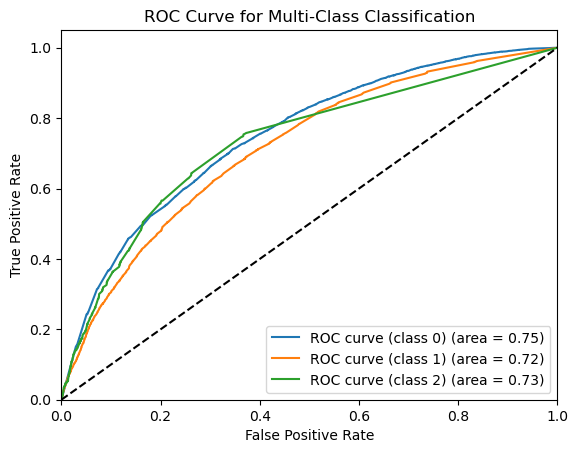

In [235]:

plt.figure()
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

In [180]:
y_hat=pipeline.predict(X_test)

In [181]:
f1_score(y_test,y_hat,average='macro')

0.4191038687723649

In [182]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     14848
           1       0.38      0.19      0.26      2461
           2       0.13      0.07      0.09       463

    accuracy                           0.82     17772
   macro avg       0.46      0.41      0.42     17772
weighted avg       0.78      0.82      0.80     17772



In [44]:
from sklearn.metrics import precision_recall_curve,average_precision_score

In [47]:
precision = {}
recall = {}
average_precision = {}
for i in range(3):
    precision[i], recall[i],_= precision_recall_curve(y_test_one_hot[:,i],probabilities[:,i])
    average_precision[i] = average_precision_score(y_test_one_hot[:,i],probabilities[:,i],average='weighted')
average_precision

{0: 0.8559150208652523, 1: 0.2306542822548645, 2: 0.04698314564507309}

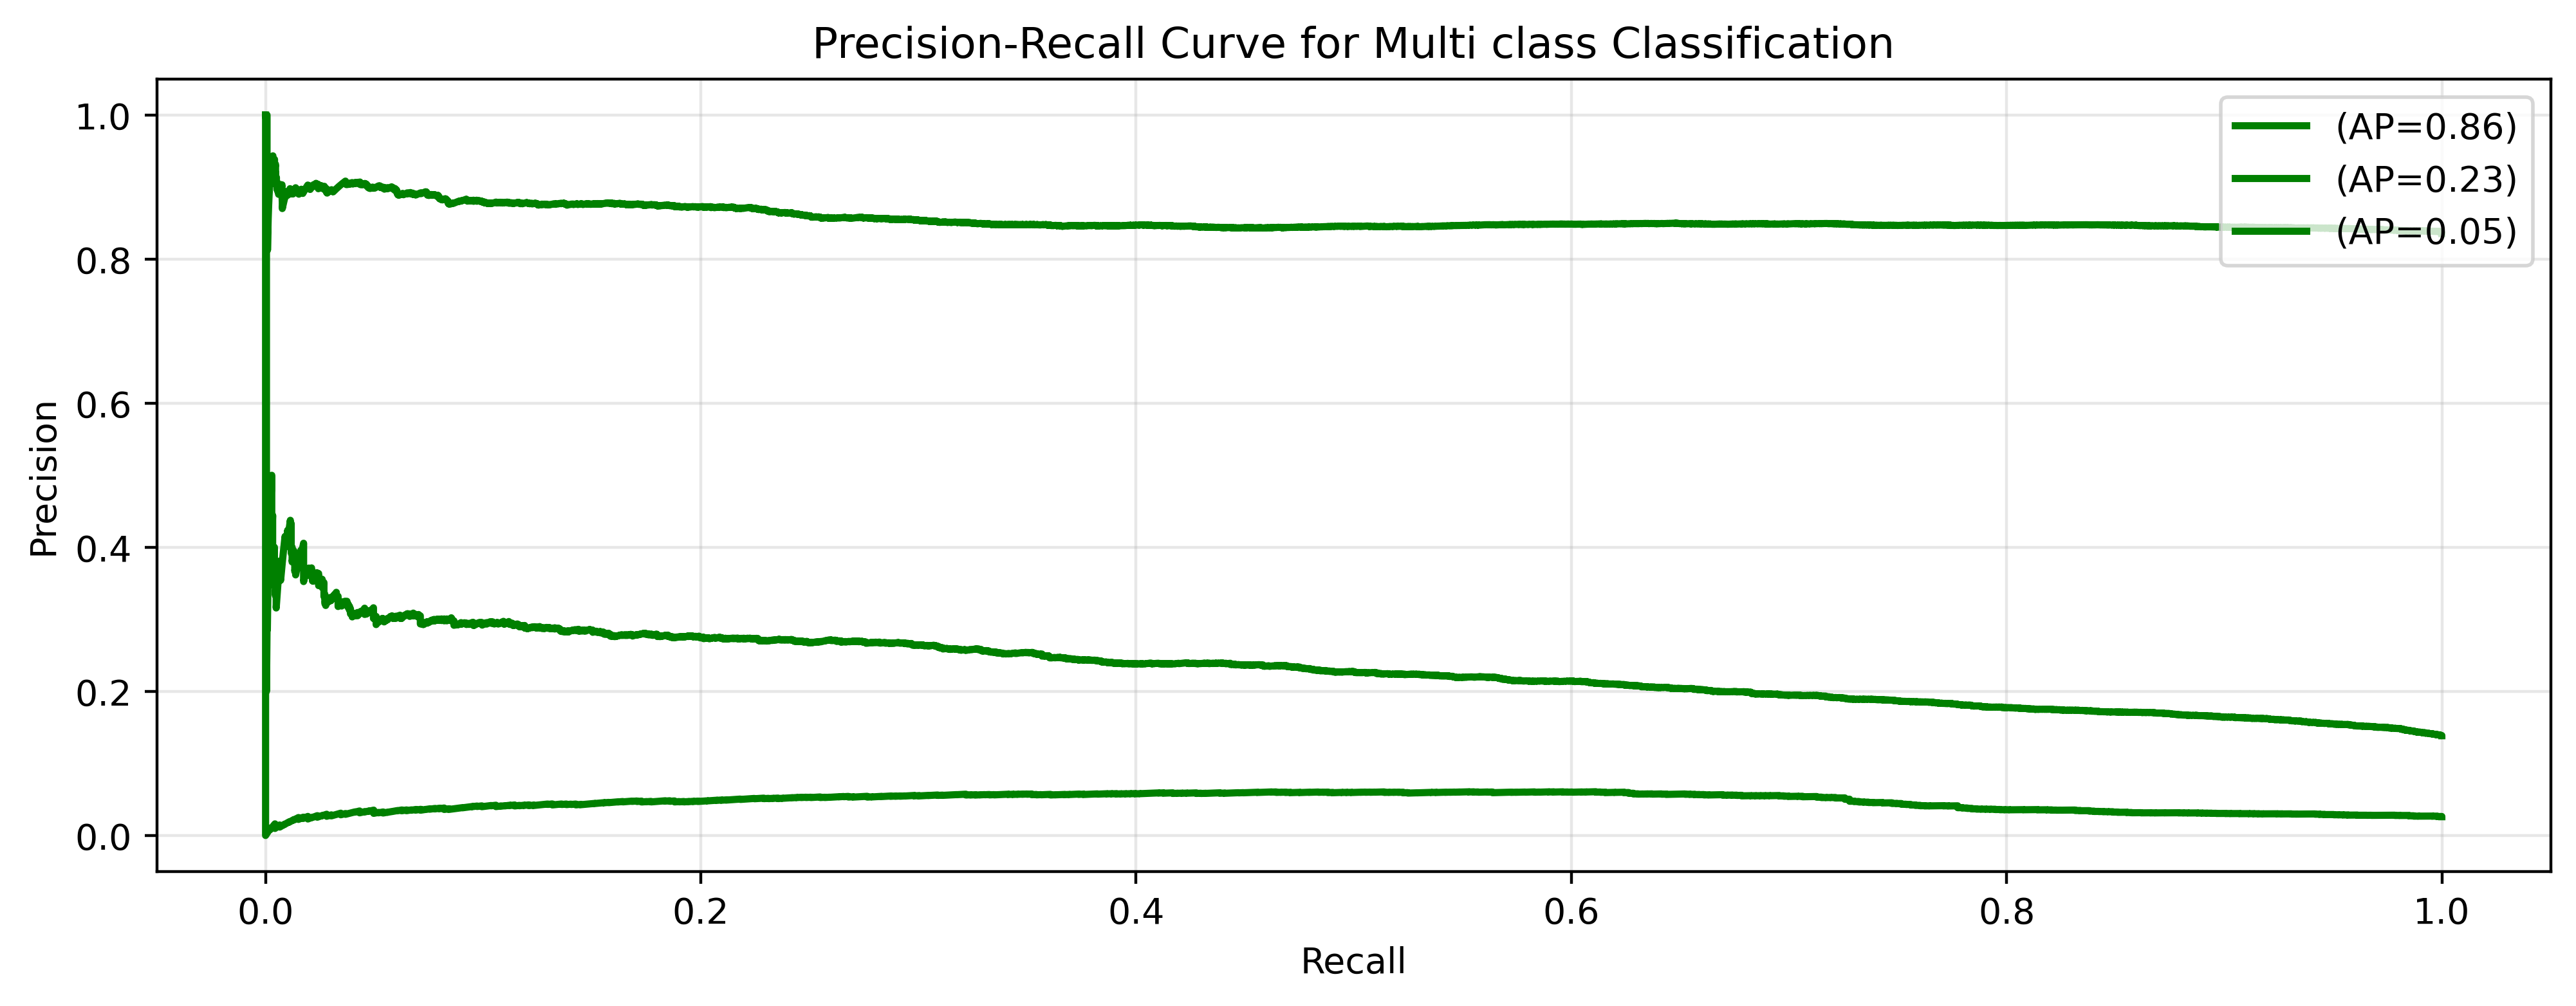

In [48]:
plt.figure(figsize=(12,4),dpi=400)
for i in range(3):
    plt.plot(recall[i], precision[i], color='green', lw=2, label=f'(AP={average_precision[i]:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Multi class Classification')
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.show()

## Hyper_Parameter Tuning 

In [281]:
import optuna
from sklearn.model_selection import cross_val_score

In [332]:
def objective(trail):
    n_estimator=trail.suggest_int('n_estimators',50,200)
    criterion=trail.suggest_categorical('criterion',["gini", "entropy", "log_loss"])
    max_features=trail.suggest_categorical('max_features',["sqrt", "log2"])
    min_samples_split = trail.suggest_int('min_samples_split', 2, 10)
    pipeline=Pipeline([
    ("preprocess",preprocess),
    ("model",RandomForestClassifier(
        n_estimators=n_estimator,
        criterion=criterion,
        max_features=max_features,
        min_samples_split=min_samples_split
    ))
    ])
    score=cross_val_score(pipeline,X_train,y_train,cv=3,scoring='roc_auc_ovr').mean()
    return score

In [333]:
study=optuna.create_study(
    direction='maximize',
    sampler=optuna.samplers.TPESampler()
)

[I 2024-10-26 12:13:32,006] A new study created in memory with name: no-name-32f81b7a-9205-4b89-b016-c52ecec9cfbe


In [334]:
study.optimize(objective,n_trials=4)

[I 2024-10-26 12:13:41,658] Trial 0 finished with value: 0.7704279018518602 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_features': 'sqrt', 'min_samples_split': 6}. Best is trial 0 with value: 0.7704279018518602.
[I 2024-10-26 12:13:51,936] Trial 1 finished with value: 0.7571718641199311 and parameters: {'n_estimators': 68, 'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_split': 4}. Best is trial 0 with value: 0.7704279018518602.
[I 2024-10-26 12:14:02,184] Trial 2 finished with value: 0.7573188813038576 and parameters: {'n_estimators': 72, 'criterion': 'log_loss', 'max_features': 'log2', 'min_samples_split': 4}. Best is trial 0 with value: 0.7704279018518602.
[I 2024-10-26 12:14:15,546] Trial 3 finished with value: 0.7605252011060166 and parameters: {'n_estimators': 101, 'criterion': 'log_loss', 'max_features': 'sqrt', 'min_samples_split': 4}. Best is trial 0 with value: 0.7704279018518602.


In [335]:
study.best_trial.value

0.7704279018518602

In [336]:
best_params=study.best_params
best_params

{'n_estimators': 74,
 'criterion': 'gini',
 'max_features': 'sqrt',
 'min_samples_split': 6}

In [337]:
model_params = {f'model__{key}': value for key, value in best_params.items()}

In [338]:
pipeline.set_params(**model_params)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Crop_Type', 'Soil_Type',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Quit',
                                                   'Season']),
                                                 ('num_outlier',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Number_Weeks_Used']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Pesticide_Use_Category'])])),
                ('model',
                 RandomForestClassifier(min_samples_split=6, n_estimators=74))])

In [339]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Crop_Type', 'Soil_Type',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Quit',
                                                   'Season']),
                                                 ('num_outlier',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Number_Weeks_Used']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Pesticide_Use_Category'])])),
                ('model',
                 RandomForestClassifier(min_samples_split=6, n_estimators=74))])

In [340]:
y_hat=pipeline.predict_proba(X_test)

In [341]:
roc_score=roc_auc_score(y_test_one_hot,y_hat,multi_class='ovr')
roc_score

0.7669861255144221

In [342]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr={}
tpr={}
roc_auc={}
for i in range(3):
    fpr[i], tpr[i],_= roc_curve(y_test_one_hot[:, i], y_hat[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

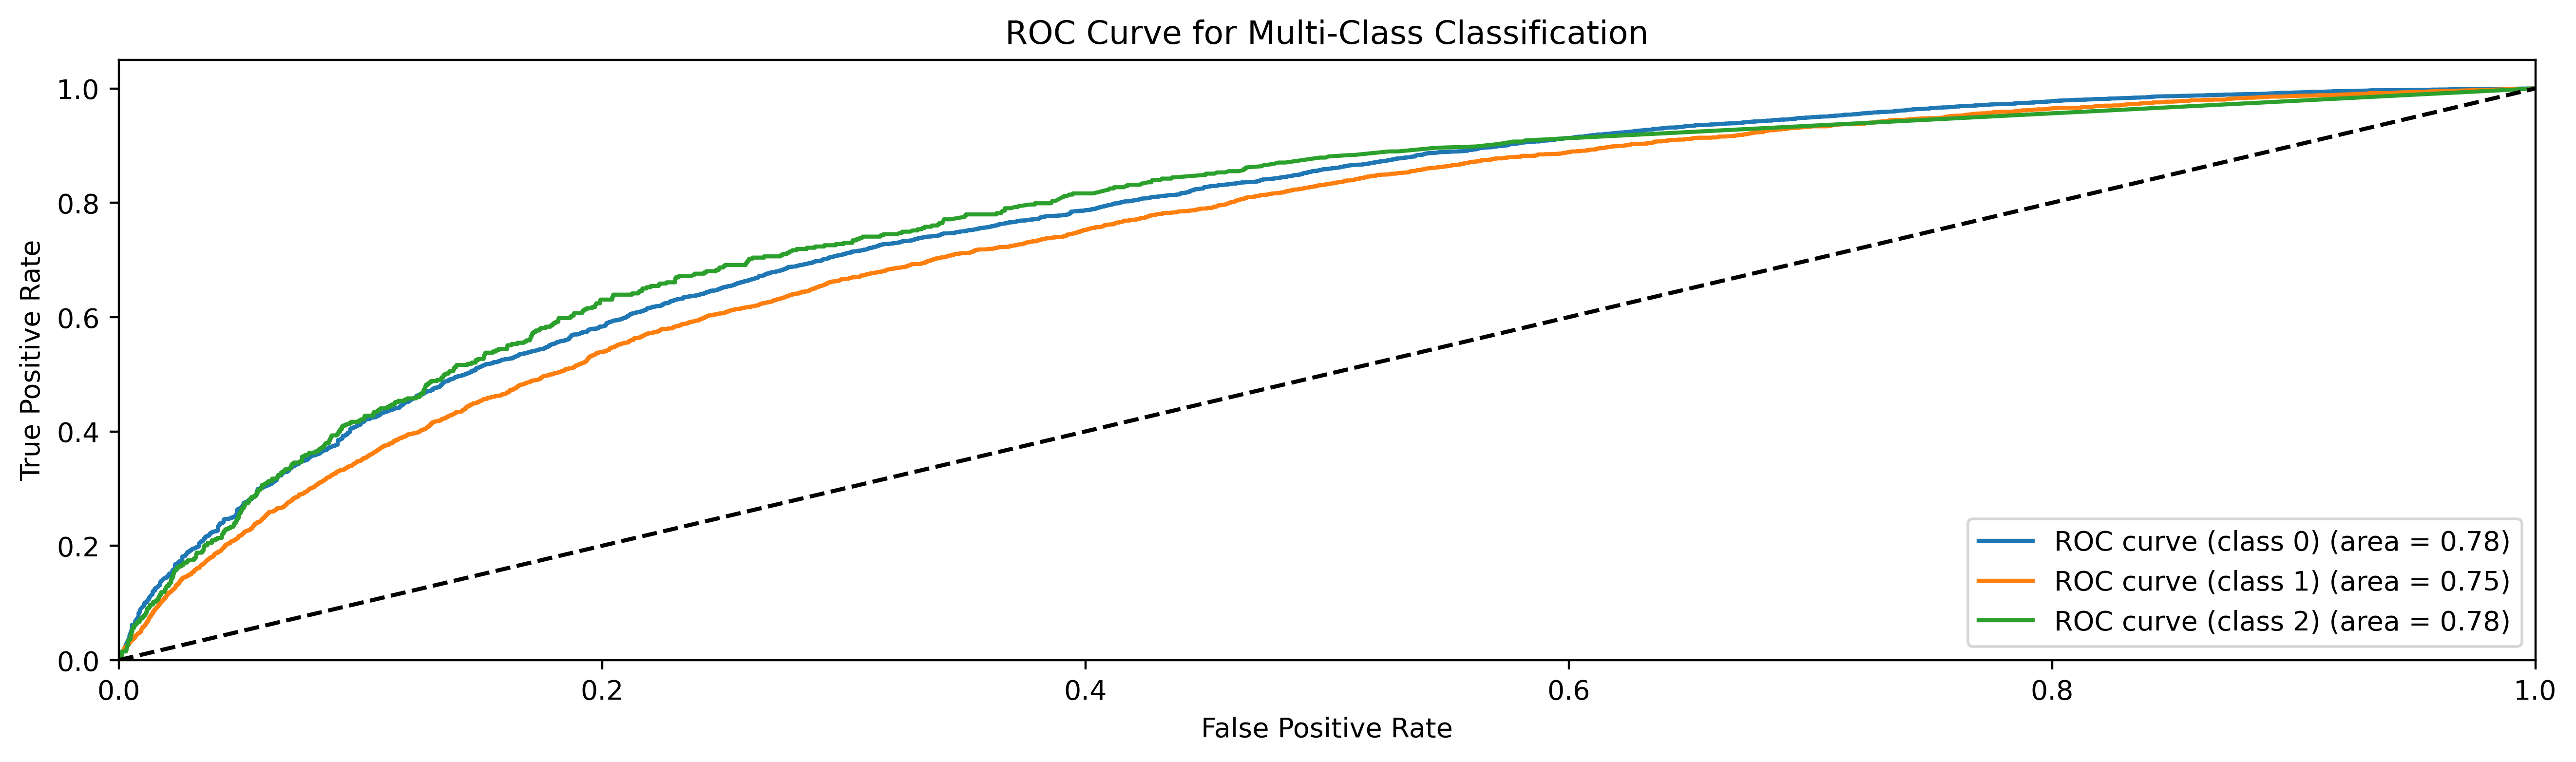

In [345]:

plt.figure(figsize=(16,4),dpi=400)
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {i}) (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc="lower right")
plt.show()

## WORKING ON IMBALANCE DATASET

In [84]:
from imblearn.over_sampling import SMOTE

In [111]:
X_transform=preprocess.fit_transform(X_train)

In [86]:
X_transform[0]

array([ 0.32771887,  1.58804866, -0.92067224, -1.02026582, -0.46537229,
        0.14499308,  0.88821639,  2.        ])

In [87]:
smote=SMOTE()
X_resample,y_resample=smote.fit_resample(X_transform,y_train)

In [88]:
X_resample.shape

(178170, 8)

In [89]:
y_resample.shape

(178170,)

In [90]:
train.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [91]:
X_resample[0]

array([ 0.32771887,  1.58804866, -0.92067224, -1.02026582, -0.46537229,
        0.14499308,  0.88821639,  2.        ])

In [92]:
val=train.drop("ID",axis=1)

In [93]:
import pandas as pd

# Assuming X_resample and y_resample are numpy arrays
# Convert X_resample and y_resample to DataFrame, then concatenate them

# Convert X_resample to a DataFrame
X_resample_df = pd.DataFrame(X_resample, columns=val.columns[:-1])  # Assuming train has the same columns for features

# Convert y_resample to a Series (or DataFrame with 1 column if you prefer)
y_resample_df = pd.Series(y_resample, name='target')  # Or use the actual column name from your dataset

# Concatenate X_resample_df and y_resample_df along the columns
resampled_df = pd.concat([X_resample_df, y_resample_df], axis=1)

# Now resampled_df is a DataFrame that includes both features and target
resampled_df.head()


,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,target
0,0.327719,1.588049,-0.920672,-1.020266,-0.465372,0.144993,0.888216,2.0,0
1,-0.571529,-0.629704,1.086163,0.911648,-0.465372,-1.282764,0.547671,2.0,2
2,1.179824,-0.629704,-0.920672,1.555619,-0.970135,1.572750,2.080124,0.0,0
3,1.021896,-0.629704,1.086163,-0.376295,1.553679,1.572750,0.292263,2.0,0
4,-1.166706,-0.629704,1.086163,2.199590,-0.970135,0.144993,-1.921279,0.0,0


In [94]:
resampled_df.shape

(178170, 9)

In [95]:
X_resample=resampled_df.drop("target",axis=1)
y_resample=resampled_df['target']

In [96]:
pipeline.fit(X_resample,y_resample)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Estimated_Insects_Count',
                                                   'Crop_Type', 'Soil_Type',
                                                   'Number_Doses_Week',
                                                   'Number_Weeks_Quit',
                                                   'Season']),
                                                 ('num_outlier',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Number_Weeks_Used']),
                                                 ('cat',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1))]),
                                                  ['Pesticide_Use_Category'])])),
                ('model',
                 RandomForestClassifier(class_weight={0: 1, 1: 2, 2: 4}))])

In [169]:
y_hat=pipeline.predict(X_test)

In [170]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     14848
           1       0.14      1.00      0.24      2461
           2       0.00      0.00      0.00       463

    accuracy                           0.14     17772
   macro avg       0.05      0.33      0.08     17772
weighted avg       0.02      0.14      0.03     17772



C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\KIIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
